## Importing Libraries & Data

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
%matplotlib inline

In [42]:
# Define path

path = r'C:\Users\alexi\OneDrive\Gun Violence'

In [43]:
# Import data

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'flagged_data'))

In [44]:
df.shape

(239677, 19)

In [45]:
df.head(2)

,Unnamed: 0,date,state,city_or_county,count_killed,count_injured,congressional_district,stolen_gun,gun_type,latitude,longitude,count_guns_involved,participant_age,state_house_district,state_senate_district,mass_casualty,mass_shooting,red_state,kill_count
0,0,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,NaN,NaN,40.3467,-79.8559,NaN,0::20,NaN,NaN,NO,YES,BLUE,Low
1,1,2013-01-01,California,Hawthorne,1,3,43.0,NaN,NaN,33.9090,-118.3330,NaN,0::20,62.0,35.0,NO,NO,BLUE,Low


In [46]:
df=df.drop(columns = {'Unnamed: 0',})

In [47]:
df.isnull().sum()

date                          0
state                         0
city_or_county                0
count_killed                  0
count_injured                 0
congressional_district    11944
stolen_gun                99498
gun_type                  99451
latitude                   7923
longitude                  7923
count_guns_involved       99451
participant_age           92298
state_house_district      38772
state_senate_district     32335
mass_casualty                 0
mass_shooting                 0
red_state                     0
kill_count                    0
dtype: int64

In [48]:
subset = df.dropna(subset=['latitude'])

In [49]:
subset.isnull().sum()

date                          0
state                         0
city_or_county                0
count_killed                  0
count_injured                 0
congressional_district     4031
stolen_gun                99460
gun_type                  99436
latitude                      0
longitude                     0
count_guns_involved       99436
participant_age           90406
state_house_district      30851
state_senate_district     24419
mass_casualty                 0
mass_shooting                 0
red_state                     0
kill_count                    0
dtype: int64

Decided to drop the null values in latitude as it accounted for just over 3% of the data which is less than the suggested threshold of 5%

## Data Prep for Regression Analysis

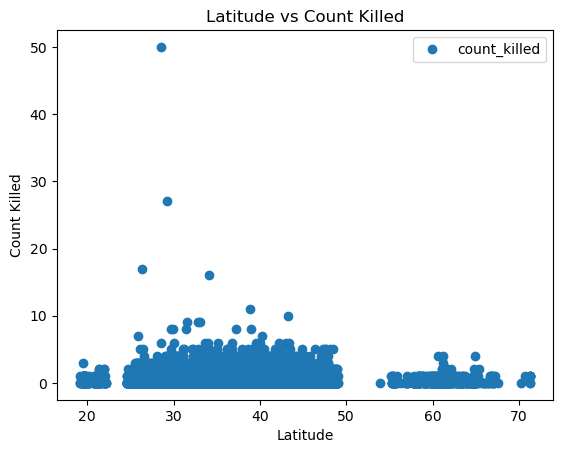

In [60]:
subset.plot(x = 'latitude', y='count_killed',style='o') 
plt.title('Latitude vs Count Killed')  
plt.xlabel('Latitude')  
plt.ylabel('Count Killed')  
plt.show()

We know from the previous exercise that none of these variables have a strong relationship. My hypothesis is that the regression wont fit well and will further prove no relationship between the variables.

In [62]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = subset['latitude'].values.reshape(-1,1)
y = subset['count_killed'].values.reshape(-1,1)

In [63]:
X

array([[40.3467],
       [33.909 ],
       [41.4455],
       ...,
       [29.9239],
       [29.7201],
       [44.7293]])

In [64]:
y

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [2]], dtype=int64)

In [65]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [66]:
# Create a regression object.

regression = LinearRegression()

In [67]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [68]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

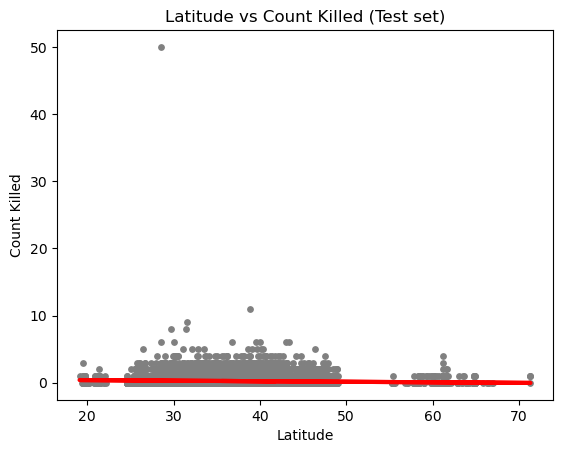

In [69]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Latitude vs Count Killed (Test set)')
plot_test.xlabel('Latitude')
plot_test.ylabel('Count Killed')
plot_test.show()

In [70]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [71]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00815437]]
Mean squared error:  0.2890658489789503
R2 score:  0.005745120920600089


In [72]:
y_predicted

array([[0.26051452],
       [0.20765545],
       [0.26479067],
       ...,
       [0.21353067],
       [0.21535888],
       [0.21293459]])

In [74]:
 # Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.260515
1,0,0.207655
2,1,0.264791
3,0,0.239854
4,0,0.307599
5,1,0.234978
6,1,0.298609
7,0,0.220016
8,0,0.211889
9,0,0.224440


As expected, the regression did not perform well. There is no relationship here to learn from and in turn be able to draw predictions from.

I don't believe there is any bias in the data.